# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv(r'C:\Users\nisho\Documents\nishoak docs\Studies\Machine Learning\Coding_Part\06_Support_Vector_Machines\01_Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [3]:
print(X) # 2D array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y) # 1D horizontal vector

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y.shape

(10,)

In [6]:
y = y.reshape(len(y),1) # Reshaping y into a 2d array
print(y)
print(y.shape)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
(10, 1)


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler # StandardScaler class expects a 2D array as input
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)   

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf') # We r using radial basis function kernel
svr_regressor.fit(X, y)

SVR()

## Predicting a new result

In [11]:
svr_regressor.predict([[6.5]])

array([0.01158103])

In [12]:
svr_regressor.predict ( sc_X.transform( [[6.5]] ) )

array([-0.27861589])

In [13]:
sc_X.transform( [[6.5]] ) 

array([[0.34815531]])

In [14]:
svr_regressor.predict (sc_X.transform( [[6.5]] ) )

array([-0.27861589])

In [15]:
sc_y.inverse_transform ( [ svr_regressor.predict ( sc_X.transform( [[6.5]] ) ) ] )

array([[170370.0204065]])

In [16]:
y_predicted = svr_regressor.predict(X)
y_predicted

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [17]:
y_predicted = sc_y.inverse_transform(y) # To inverse the scaling
y_predicted

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

## Visualising the SVR results

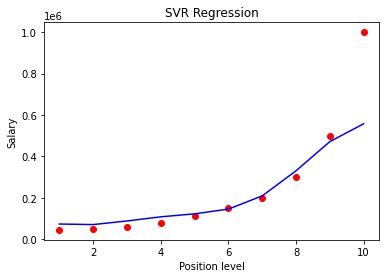

In [18]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), (sc_y.inverse_transform( [svr_regressor.predict(X) ] )).transpose() , color = 'blue')

plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [19]:
sc_X.inverse_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [20]:
sc_X.inverse_transform(X).shape

(10, 1)

In [21]:
sc_y.inverse_transform( [svr_regressor.predict(X) ] ) 

array([[ 73474.15615697,  70786.94584626,  88213.00902103,
        108254.98574956, 122574.52250599, 145503.10688572,
        209410.23132923, 330606.89204569, 471671.95587315,
        557821.75899897]])

## Visualising the SVR results (for higher resolution and smoother curve)

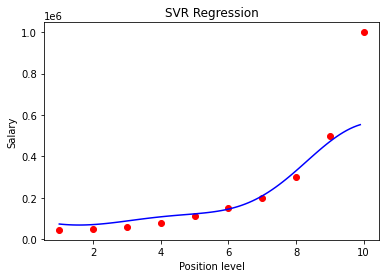

In [22]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, (sc_y.inverse_transform( [svr_regressor.predict(sc_X.transform(X_grid))])).transpose(), color = 'blue')

plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()